<a href="https://colab.research.google.com/github/karan51ngh/machineLearning/blob/main/Titanic%20Case%20Study/Titanic_Survival_Rate_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Overview**

The sinking of the **RMS Titanic** is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we target to complete the analysis of what sorts of people were likely to survive.

data description and files: https://www.kaggle.com/c/titanic/data

##Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from google.colab import drive

sns.set(rc={'figure.figsize':(12, 10)})

##Loading Data

In [ ]:
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/mydrive/MyDrive/ColabNotebooks/ML7/train.csv')
#we have to classify, predict wether a person survived or not

In [ ]:
df

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]

##Data Inspection

**Types of Features :** 
- **Categorical**  - Sex, and Embarked.
- **Continuous**  - Age, Fare
- **Discrete**     - SibSp, Parch.
- **Alphanumeric** - Cabin

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.describe()

PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]

##data cleaning

In [ ]:
df.drop(columns=['Cabin'],inplace=True)#dropping column, coz many missing values

In [ ]:
df

PassengerId  Survived  Pclass  ...            Ticket     Fare  Embarked
0              1         0       3  ...         A/5 21171   7.2500         S
1              2         1       1  ...          PC 17599  71.2833         C
2              3         1       3  ...  STON/O2. 3101282   7.9250         S
3              4         1       1  ...            113803  53.1000         S
4              5         0       3  ...            373450   8.0500         S
..           ...       ...     ...  ...               ...      ...       ...
886          887         0       2  ...            211536  13.0000         S
887          888         1       1  ...            112053  30.0000         S
888          889         0       3  ...        W./C. 6607  23.4500         S
889          890         1       1  ...            111369  30.0000         C
890          891         0       3  ...            370376   7.7500         Q

[891 rows x 11 columns]

In [ ]:
df["Embarked"]=df["Embarked"].fillna(value='S')

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [ ]:
mean = df["Age"].mean()
std = df["Age"].std()
is_null = df["Age"].isnull().sum()
    
# compute random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
# fill NaN values in Age column with random values generated
age_slice = df["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
df["Age"] = age_slice

In [ ]:
df

PassengerId  Survived  Pclass  ...            Ticket     Fare  Embarked
0              1         0       3  ...         A/5 21171   7.2500         S
1              2         1       1  ...          PC 17599  71.2833         C
2              3         1       3  ...  STON/O2. 3101282   7.9250         S
3              4         1       1  ...            113803  53.1000         S
4              5         0       3  ...            373450   8.0500         S
..           ...       ...     ...  ...               ...      ...       ...
886          887         0       2  ...            211536  13.0000         S
887          888         1       1  ...            112053  30.0000         S
888          889         0       3  ...        W./C. 6607  23.4500         S
889          890         1       1  ...            111369  30.0000         C
890          891         0       3  ...            370376   7.7500         Q

[891 rows x 11 columns]

In [ ]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
male=pd.get_dummies(df['Sex'])

In [ ]:
male

female  male
0         0     1
1         1     0
2         1     0
3         1     0
4         0     1
..      ...   ...
886       0     1
887       1     0
888       1     0
889       0     1
890       0     1

[891 rows x 2 columns]

In [ ]:
df = pd.concat([df, male], axis =1)

In [ ]:
df

PassengerId  Survived  Pclass  ... Embarked female  male
0              1         0       3  ...        S      0     1
1              2         1       1  ...        C      1     0
2              3         1       3  ...        S      1     0
3              4         1       1  ...        S      1     0
4              5         0       3  ...        S      0     1
..           ...       ...     ...  ...      ...    ...   ...
886          887         0       2  ...        S      0     1
887          888         1       1  ...        S      1     0
888          889         0       3  ...        S      1     0
889          890         1       1  ...        C      0     1
890          891         0       3  ...        Q      0     1

[891 rows x 13 columns]

In [ ]:
embark=pd.get_dummies(data=df['Embarked'])

In [ ]:
embark

C  Q  S
0    0  0  1
1    1  0  0
2    0  0  1
3    0  0  1
4    0  0  1
..  .. .. ..
886  0  0  1
887  0  0  1
888  0  0  1
889  1  0  0
890  0  1  0

[891 rows x 3 columns]

In [ ]:
df = pd.concat([df, embark], axis = 1)

In [ ]:
df

PassengerId  Survived  Pclass  ...  C  Q  S
0              1         0       3  ...  0  0  1
1              2         1       1  ...  1  0  0
2              3         1       3  ...  0  0  1
3              4         1       1  ...  0  0  1
4              5         0       3  ...  0  0  1
..           ...       ...     ...  ... .. .. ..
886          887         0       2  ...  0  0  1
887          888         1       1  ...  0  0  1
888          889         0       3  ...  0  0  1
889          890         1       1  ...  1  0  0
890          891         0       3  ...  0  1  0

[891 rows x 16 columns]

In [ ]:
df.drop(columns=['female','C'],inplace=True)

In [ ]:
df

PassengerId  Survived  Pclass  ... male  Q  S
0              1         0       3  ...    1  0  1
1              2         1       1  ...    0  0  0
2              3         1       3  ...    0  0  1
3              4         1       1  ...    0  0  1
4              5         0       3  ...    1  0  1
..           ...       ...     ...  ...  ... .. ..
886          887         0       2  ...    1  0  1
887          888         1       1  ...    0  0  1
888          889         0       3  ...    0  0  1
889          890         1       1  ...    1  0  0
890          891         0       3  ...    1  1  0

[891 rows x 14 columns]

##Numerical Value Analysis

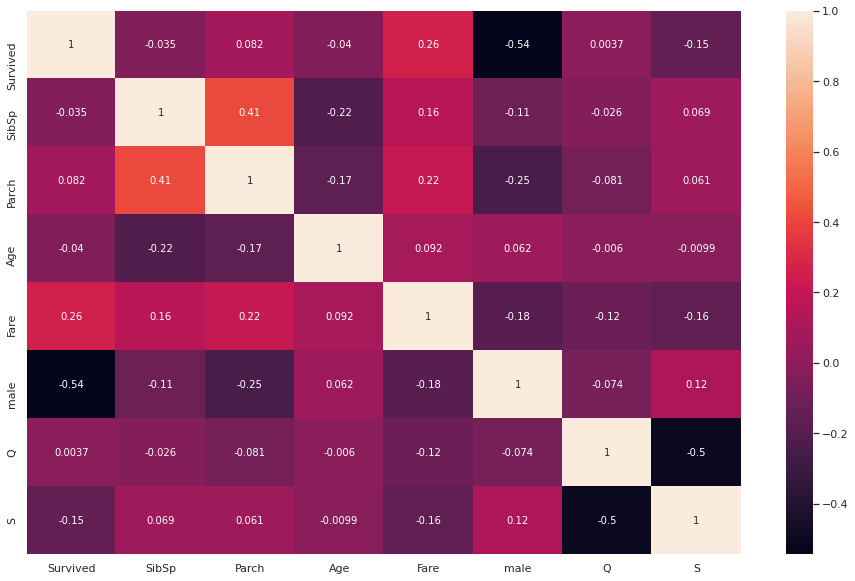

In [ ]:
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(df[["Survived","SibSp","Parch","Age","Fare","male","Q","S"]].corr(), annot=True)
#corr mtx only gives atentative idea, this doesnt help us reject any parameter, only gives an intution

**Conclusion :**

Only Fare and Gender seem to have a significative correlation with the survival probability.

It doesn't mean that the other features are not usefull. Subpopulations in these features can be correlated with the survival. To determine this, we need to explore in detail these features

##sibsp - Number of siblings / spouses aboard the Titanic </font>

In [ ]:
df['SibSp'].nunique()#siblings or spouse

7

In [ ]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


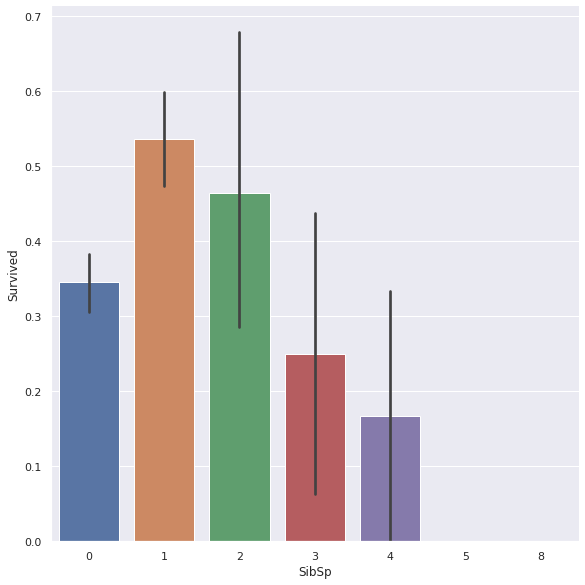

In [ ]:
bargraph_sibsp = sns.factorplot(x = "SibSp", y = "Survived", data = df, kind = "bar", size = 8)
# bargraph_sibsp = bargraph_sibsp.set_ylabels("survival probability")

It seems that passengers having a lot of siblings/spouses have less chance to survive.
<br />
Single passengers (0 SibSP) or with two other persons (SibSP 1 or 2) have more chance to survive.

##Age

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


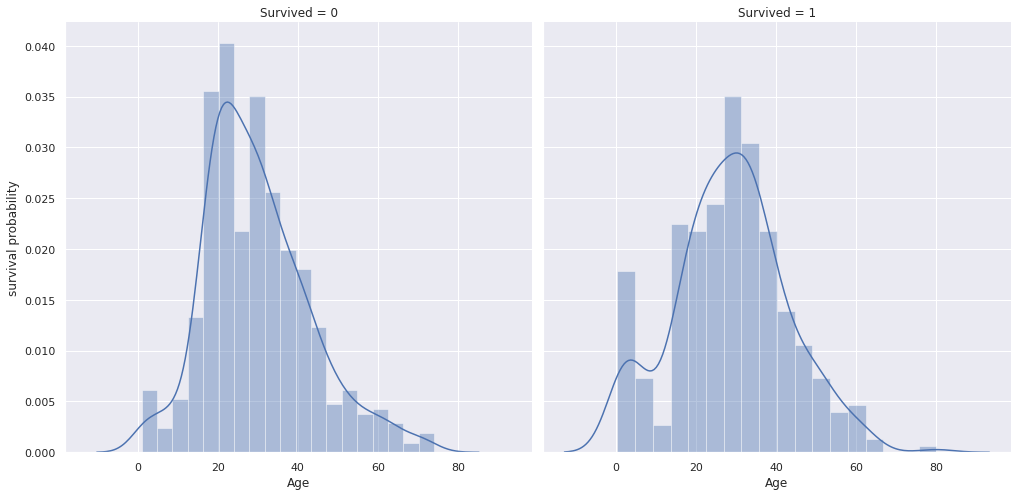

In [ ]:
age_visual = sns.FacetGrid(df, col = 'Survived', size=7)
age_visual = age_visual.map(sns.distplot, "Age")
age_visual = age_visual.set_ylabels("survival probability")

Age distribution seems to be a tailed distribution, maybe a gaussian distribution.

We notice that age distributions are not the same in the survived and not survived subpopulations. Indeed, there is a peak corresponding to young passengers, that have survived. We also see that passengers between 60-80 have less survived. 

So, even if "Age" is not correlated with "Survived", we can see that there is age categories of passengers that of have more or less chance to survive.

It seems that very young passengers have more chance to survive.

##Sex

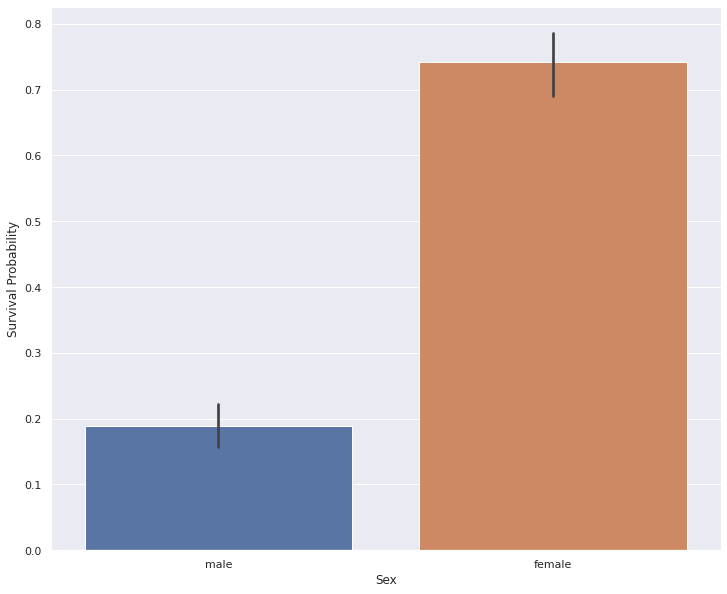

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
age_plot = sns.barplot(x = "Sex",y = "Survived", data = df)
age_plot = age_plot.set_ylabel("Survival Probability")

In [ ]:
df[["Sex","Survived"]].groupby('Sex').mean()

Survived
Sex             
female  0.742038
male    0.188908

##PClass</font>

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


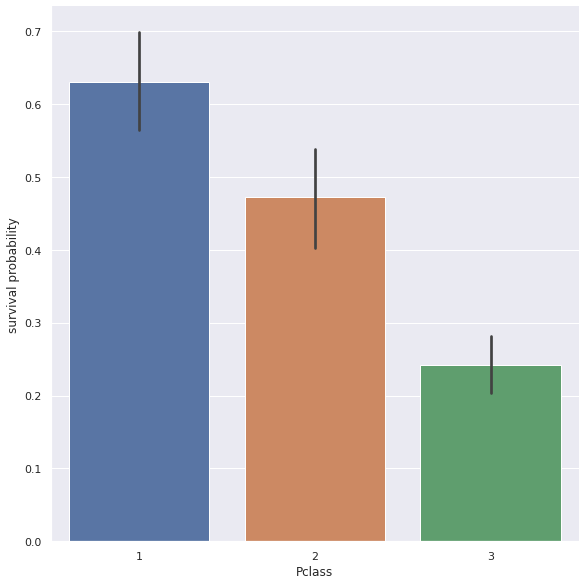

In [ ]:
pclass = sns.factorplot(x = "Pclass", y = "Survived", data = df, kind = "bar", size = 8)
pclass = pclass.set_ylabels("survival probability")

It is clearly obvious that Male have less chance to survive than Female. So Sex, might play an important role in the prediction of the survival.

##Pclass vs Survived by Sex</font>

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


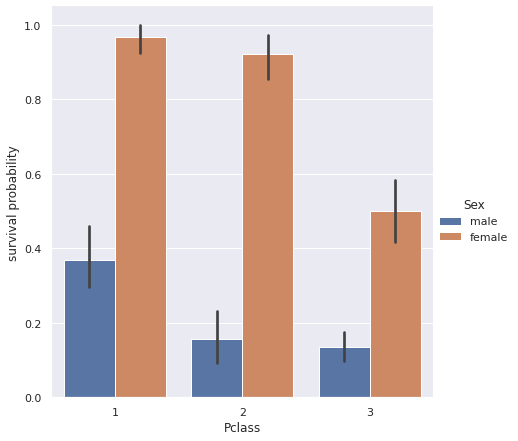

In [ ]:
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=df, size=6, kind="bar")
g = g.set_ylabels("survival probability")

## Embarked </font>

In [ ]:
df["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


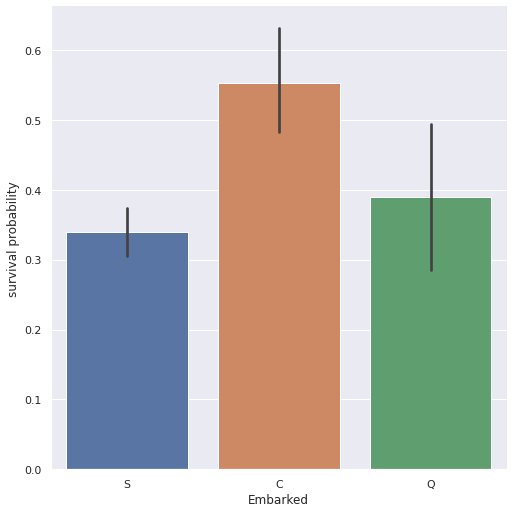

In [ ]:
g = sns.factorplot(x="Embarked", y="Survived", data=df, size=7, kind="bar")
g = g.set_ylabels("survival probability")

### Let's find the reason

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


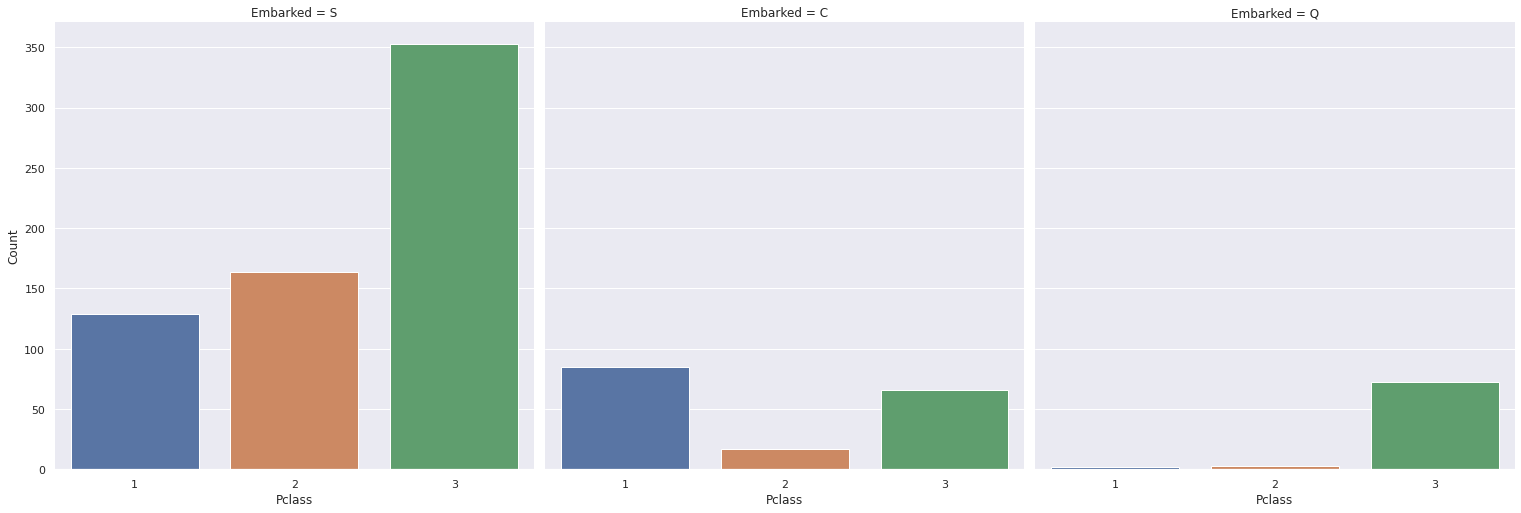

In [ ]:
# Explore Pclass vs Embarked 
g = sns.factorplot("Pclass", col="Embarked",  data=df, size=7, kind="count")
g.despine(left=True)
g = g.set_ylabels("Count")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


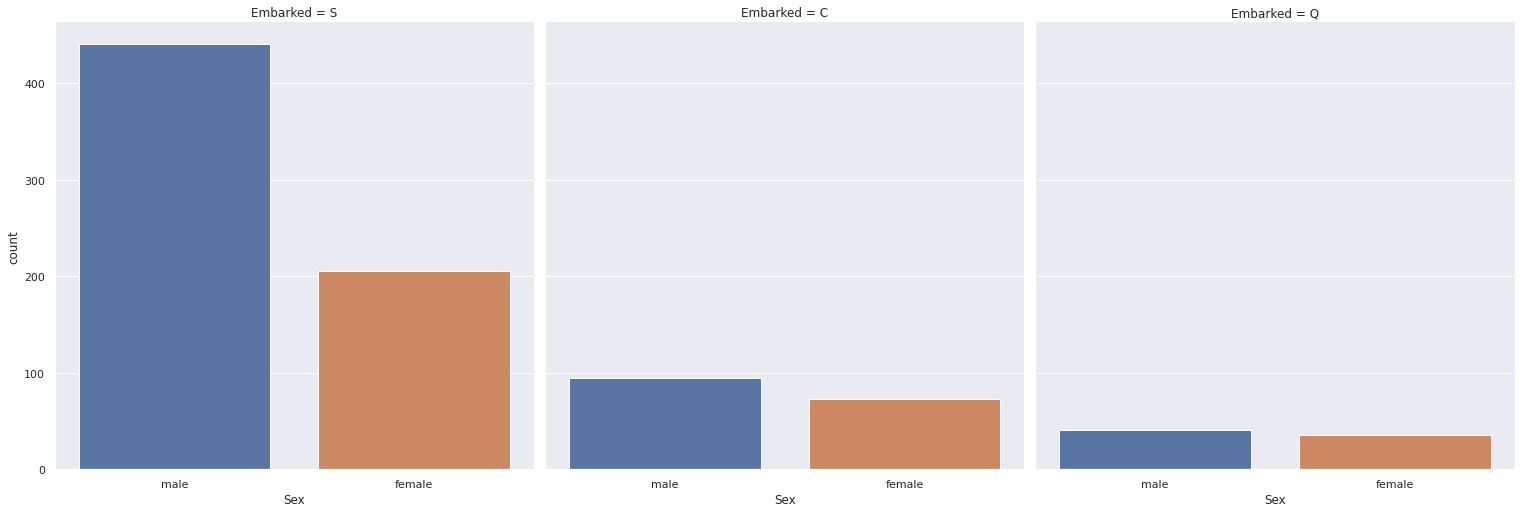

In [ ]:
g = sns.factorplot("Sex", col="Embarked",  data=df, size=7, kind="count")

##Preparing data</font>

In [ ]:
df

PassengerId  Survived  Pclass  ... male  Q  S
0              1         0       3  ...    1  0  1
1              2         1       1  ...    0  0  0
2              3         1       3  ...    0  0  1
3              4         1       1  ...    0  0  1
4              5         0       3  ...    1  0  1
..           ...       ...     ...  ...  ... .. ..
886          887         0       2  ...    1  0  1
887          888         1       1  ...    0  0  1
888          889         0       3  ...    0  0  1
889          890         1       1  ...    1  0  0
890          891         0       3  ...    1  1  0

[891 rows x 14 columns]

##Splitting

In [ ]:
# input and output data

x = df.drop(columns=['Survived','Name','PassengerId','Sex','Embarked','Ticket'], axis = 1)
y = df['Survived']

In [ ]:
x

Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         3  22.0      1      0   7.2500     1  0  1
1         1  38.0      1      0  71.2833     0  0  0
2         3  26.0      0      0   7.9250     0  0  1
3         1  35.0      1      0  53.1000     0  0  1
4         3  35.0      0      0   8.0500     1  0  1
..      ...   ...    ...    ...      ...   ... .. ..
886       2  27.0      0      0  13.0000     1  0  1
887       1  19.0      0      0  30.0000     0  0  1
888       3  28.0      1      2  23.4500     0  0  1
889       1  26.0      0      0  30.0000     1  0  0
890       3  32.0      0      0   7.7500     1  1  0

[891 rows x 8 columns]

In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
# splitting into training and testing data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state =0)

##Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)

##Classification

In [ ]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators=1000, criterion = 'entropy', random_state = 42 )

In [ ]:
logreg.fit(xtrain, ytrain)
svc_classifier.fit(xtrain, ytrain)
dt_classifier.fit(xtrain, ytrain)
knn_classifier.fit(xtrain, ytrain)
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
logreg_ypred = logreg.predict(xtest)
svc_classifier_ypred = svc_classifier.predict(xtest)
dt_classifier_ypred = dt_classifier.predict(xtest)
knn_classifier_ypred = knn_classifier.predict(xtest)
rf_classifier_ypred = rf_classifier.predict(xtest)

In [ ]:
# finding accuracy
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(ytest, logreg_ypred)
svc_classifier_acc = accuracy_score(ytest, svc_classifier_ypred)
dt_classifier_acc = accuracy_score(ytest, dt_classifier_ypred)
knn_classifier_acc = accuracy_score(ytest, knn_classifier_ypred)
rf_classifier_acc = accuracy_score(ytest, rf_classifier_ypred)

In [ ]:
print ("Logistic Regression : ", round(logreg_acc*100, 2))
print ("Support Vector      : ", round(svc_classifier_acc*100, 2))
print ("Decision Tree       : ", round(dt_classifier_acc*100, 2))
print ("K-NN Classifier     : ", round(knn_classifier_acc*100, 2))
print ("Random Forest       : ", round(rf_classifier_acc*100, 2))

Logistic Regression :  79.85
Support Vector      :  80.97
Decision Tree       :  78.36
K-NN Classifier     :  80.6
Random Forest       :  82.46
